In [2]:
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import LogisticRegression ,RandomForestClassifier ,LinearSVC
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkConf
import seaborn as sns

In [3]:
new_df=pd.read_csv('data/output.csv')

In [4]:
states=new_df["state"].value_counts() / len(new_df["state"])

state
failed        0.593861
successful    0.406139
Name: count, dtype: float64


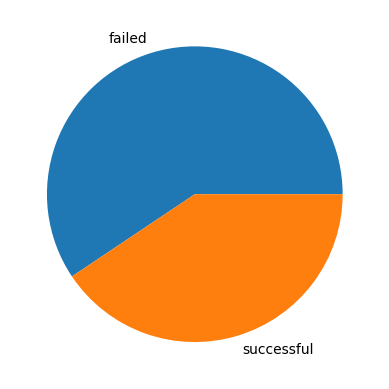

In [5]:
print(states)
plt.pie(list(states.values) , labels = list(states.index))
plt.show()

Text(0.5, 0, 'Number of campaigns')

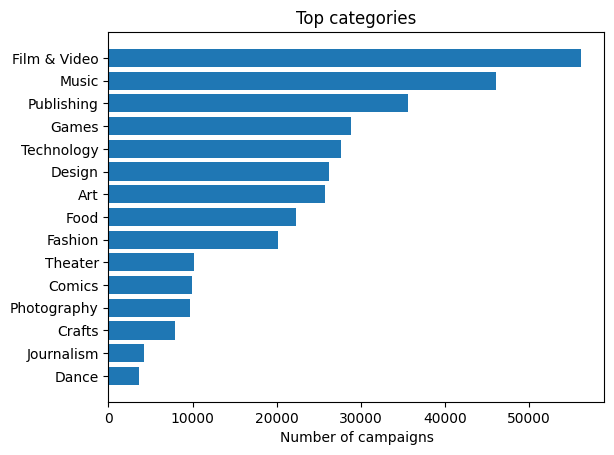

In [6]:
x = new_df.main_category.value_counts().index.tolist()
y = new_df.main_category.value_counts()
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Top categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

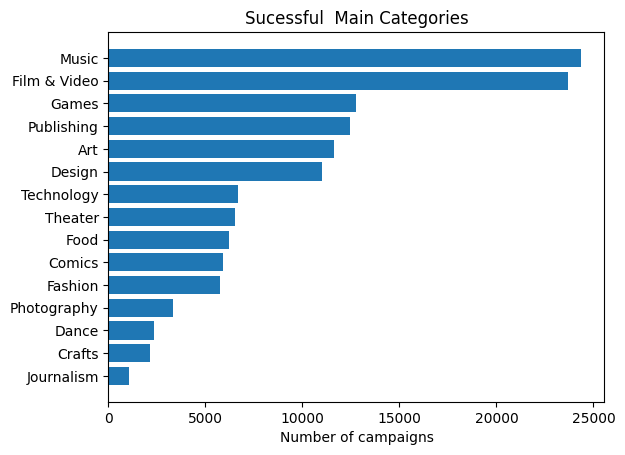

In [7]:
values = new_df.loc[new_df.state=='successful','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Sucessful  Main Categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

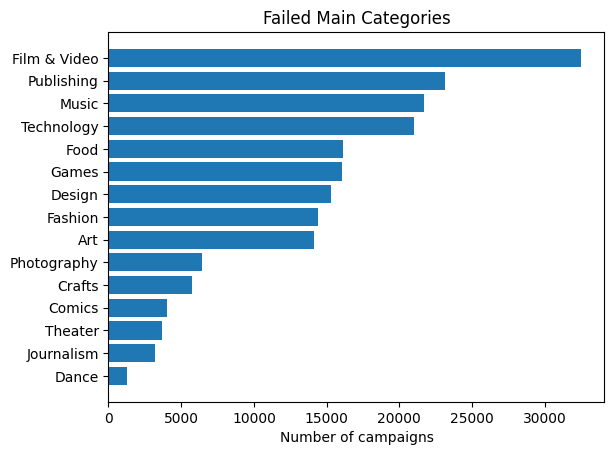

In [8]:
values = new_df.loc[new_df.state=='failed','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main Categories')
plt.xlabel('Number of campaigns')

In [9]:
successful = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Failed Campaigns')


TypeError: can only concatenate str (not "int") to str

Text(0.5, 1.0, 'Average USD Pledged Among Successful Campaigns')

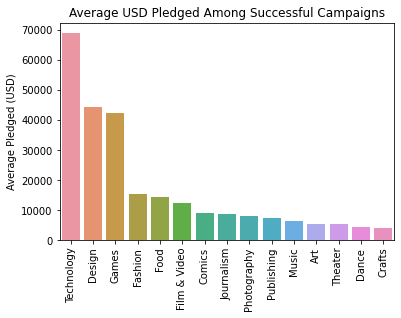

In [ ]:


successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Successful Campaigns')



Text(0.5, 1.0, 'Average goal Among Failed Campaigns')

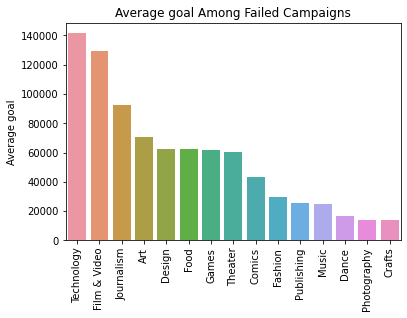

In [ ]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among Failed Campaigns')

Text(0.5, 1.0, 'Average goal Among successful Campaigns')

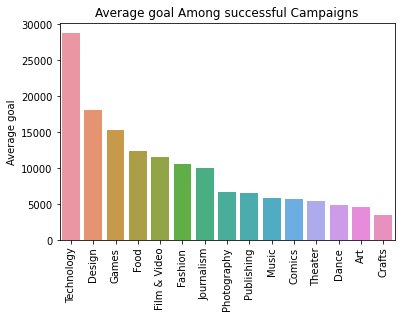

In [ ]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among successful Campaigns')

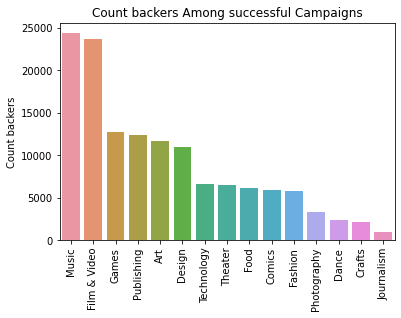

In [ ]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)
figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among Failed Campaigns')

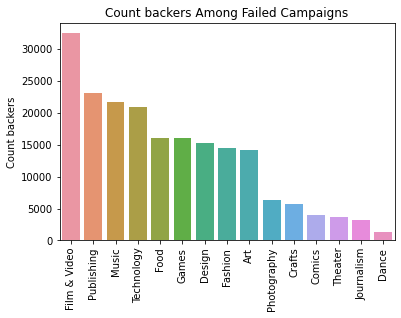

In [ ]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)

figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among Failed Campaigns')

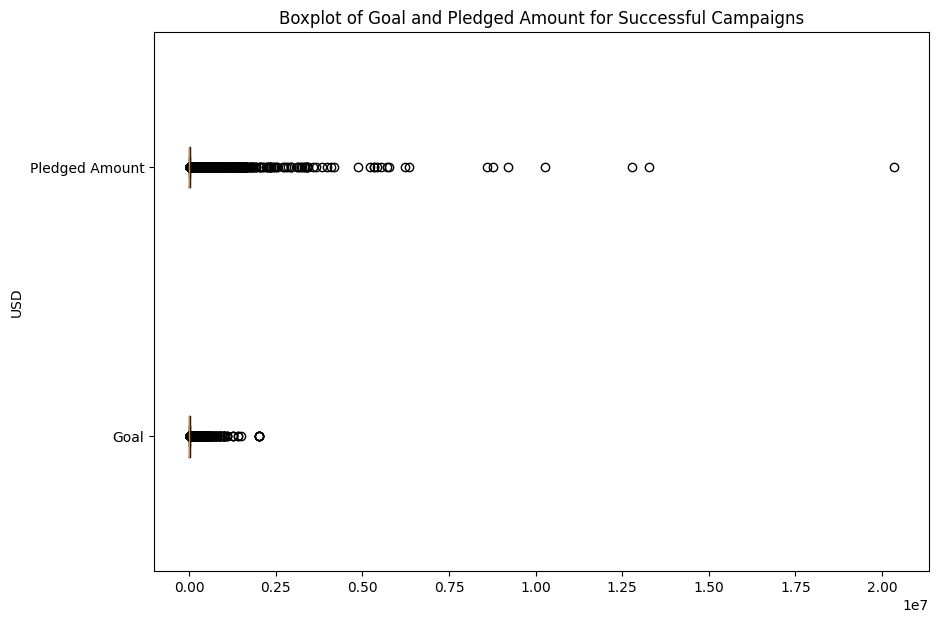

In [53]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'successful')]
data = [data_values['goal'], data_values['usd pledged']]
plt.boxplot(data, vert=False)
plt.title('Boxplot of Goal and Pledged Amount for Successful Campaigns')
plt.yticks(ticks=[1,2],labels=['Goal', 'Pledged Amount'])
plt.ylabel('USD')
plt.show()

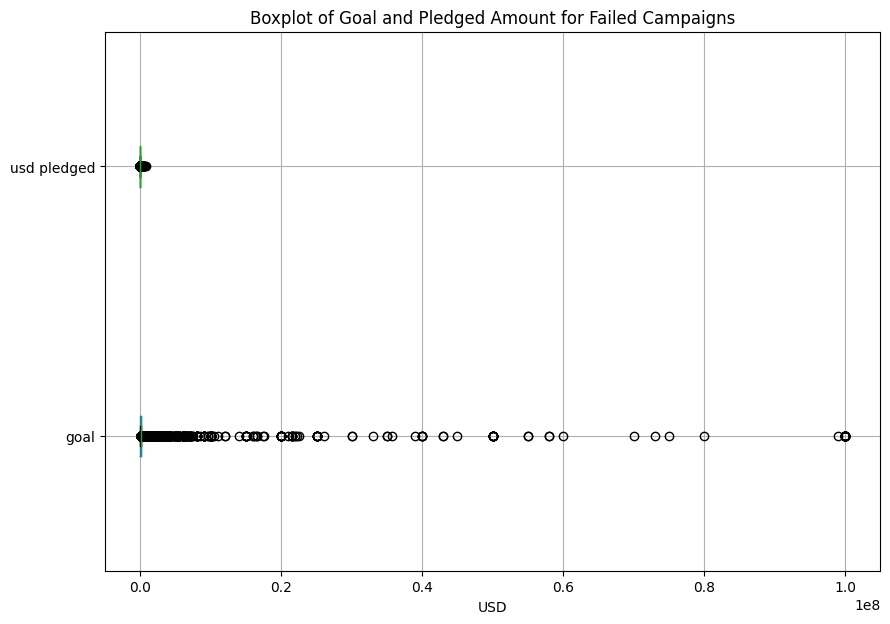

In [57]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'failed')]
# data = [data_values['goal'], data_values['usd pledged']]

data_values.boxplot(column=['goal', 'usd pledged'], vert=False)
# plt.boxplot(data)
plt.title('Boxplot of Goal and Pledged Amount for Failed Campaigns')
# plt.xticks([1, 2], ['Goal', 'Pledged Amount'])
plt.xlabel('USD')
plt.show()

Text(0.5, 0, 'Number of campaigns')

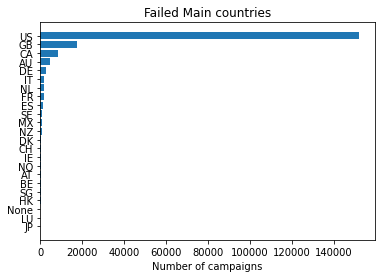

In [16]:
values = new_df.loc[new_df.state=='failed','country'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main countries')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

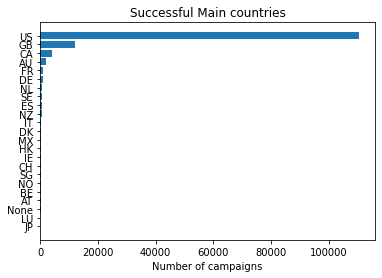

In [17]:
values = new_df.loc[new_df.state=='successful','country'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Successful Main countries')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

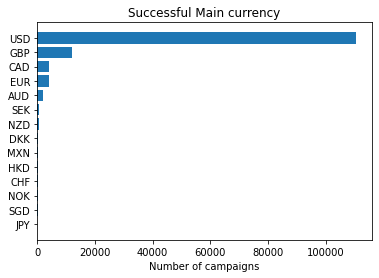

In [18]:
values = new_df.loc[new_df.state=='successful','currency'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Successful Main currency')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

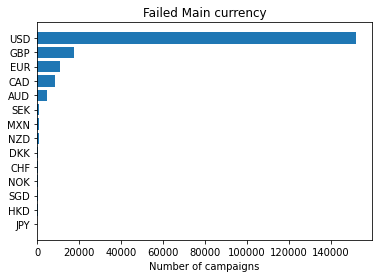

In [19]:
values = new_df.loc[new_df.state=='failed','currency'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main currency')
plt.xlabel('Number of campaigns')

Text(0.5, 1.0, 'Goal')

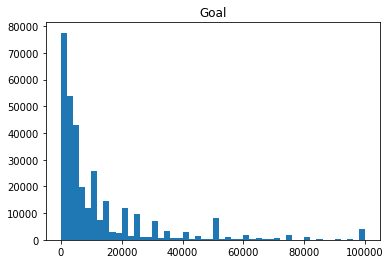

In [20]:
plt.hist(new_df['goal'],range=(0, 100000), bins=50)
plt.title("Goal")

In [21]:
successful = new_df.loc[(new_df.state == 'successful')]

Text(0.5, 1.0, 'successful Goal')

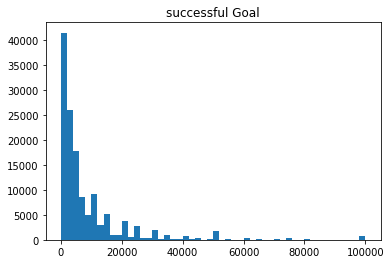

In [22]:
plt.hist( successful['goal'],range=(0, 100000), bins=50)
plt.title("successful Goal")

In [23]:
failed= new_df.loc[(new_df.state == 'failed')]

Text(0.5, 1.0, 'Failed Goal')

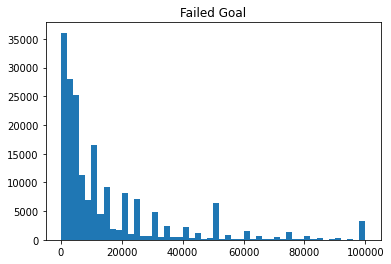

In [24]:
plt.hist( failed['goal'],range=(0, 100000), bins=50)
plt.title("Failed Goal")

Text(0.5, 1.0, 'usd pledged')

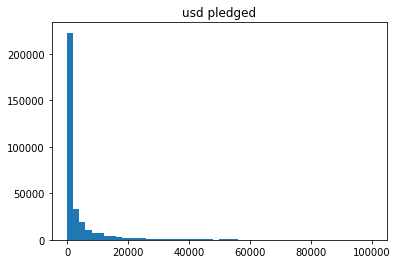

In [25]:
plt.hist(new_df['usd pledged'],range=(0, 100000), bins=50)
plt.title("usd pledged")

Text(0.5, 1.0, 'Failed usd pledged')

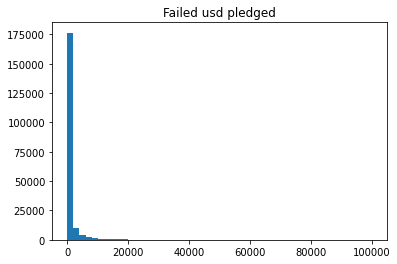

In [26]:
plt.hist( failed['usd pledged'],range=(0, 100000), bins=50)
plt.title("Failed usd pledged")

Text(0.5, 1.0, 'Successful usd pledged')

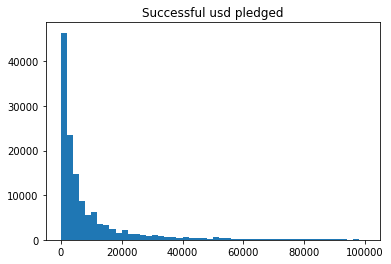

In [27]:
plt.hist( successful['usd pledged'],range=(0, 100000), bins=50)
plt.title("Successful usd pledged")

In [28]:
# Calculate a duration in days column
new_df['duration_days'] = (pd.to_datetime(new_df['deadline']) - pd.to_datetime(new_df['launched'])).dt.days

Text(0, 0.5, 'Count')

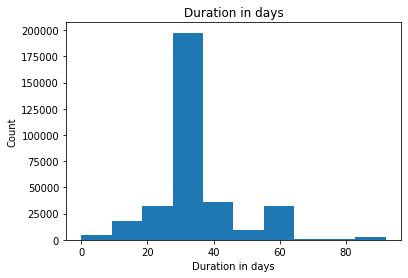

In [29]:
# Plot the distribution of duration_days
plt.hist(new_df['duration_days'])
plt.title("Duration in days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

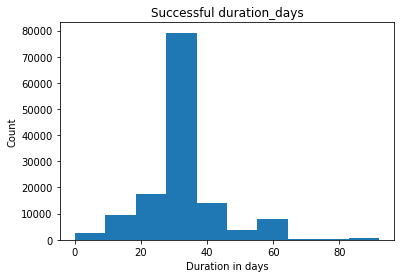

In [30]:
# Subset successful campaigns
successful = new_df.loc[new_df['state'] == 'successful']

# Plot the distribution of duration_days
plt.hist(successful['duration_days'])
plt.title("Successful duration_days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

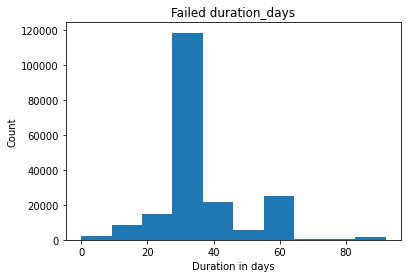

In [31]:
# Subset failed campaigns
failed = new_df.loc[new_df['state'] == 'failed']

# Plot the distribution of duration_days
plt.hist(failed['duration_days'])
plt.title("Failed duration_days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

In [32]:
#
# ? How does the project duration affect the success rate of the projects?
successful_mean_duration = successful['duration_days'].mean()
failed_mean_duration = failed['duration_days'].mean()

print("The average duration for successful campaigns: " + str(successful_mean_duration) + " days")
print("The average duration for failed campaigns: " + str(failed_mean_duration) + " days")

The average duration for successful campaigns: 31.766247248256924 days
The average duration for failed campaigns: 34.86501142989496 days


<Axes: xlabel='goal', ylabel='main_category'>

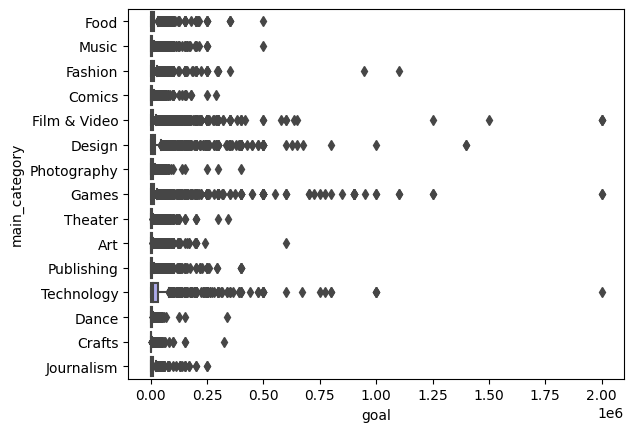

In [59]:
# What are the distribution and statistics of the funding goals and pledges for different project categories?
# Subset the successful projects
successful = new_df.loc[new_df['state'] == 'successful']

# Plot the boxplot
sns.boxplot(y='main_category', x='goal', data=successful, orient='h')

<Axes: xlabel='usd pledged', ylabel='main_category'>

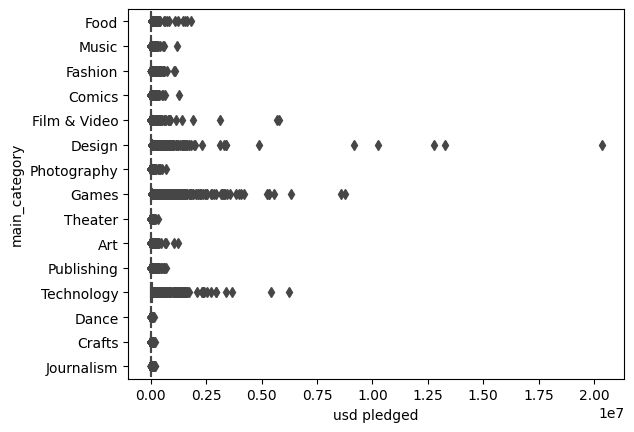

In [60]:
# Plot the boxplot
sns.boxplot(y='main_category', x='usd pledged', data=successful, orient='h')

In [36]:
# change 'state' column to 0 and 1
new_df['state'] = new_df['state'].replace('failed', 0)
new_df['state'] = new_df['state'].replace('successful', 1)

In [38]:
#How does the number of backers correlate with the project success?
corr = new_df[['state', 'backers']].corr(method='pearson')
print(corr)

            state   backers
state    1.000000  0.127688
backers  0.127688  1.000000
